# Introduction

The purpose of this notebook is to serve as an exploratory data analysis (EDA) of the Tecator data set. These data, for the purposes of this project, consist of 215 samples of finely-chopped pure meat with different moisture, fat, and protein contents. The functional inputs are $X_{i}(t)$ and the scalar outputs are $y_{i}$. Each $X_{i}(t)$ consists of 100 observations of wavelength absorbances from 850 nm to 1050 nm, while each $y_{i}(t)$ consists of percent fat content. Please see [the data set reference](https://lib.stat.cmu.edu/datasets/tecator) for more info.

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tecatorfda.data import generate_tecator_fat, load_tecator_fat

# Fetch and save the data

This uses a custom function in `src/tecatorfda/data.py`.

In [2]:
generate_tecator_fat()

## Load the data

This also uses a custom function in the same location.

In [3]:
tecator_df, fat_df, wavelength_grid, wavelength_unit = load_tecator_fat()

# Summaries of $X(t)$ and $y$

In [4]:
tecator_df.describe()

,850.0,852.0202,854.0404,856.0606,858.0808,860.101,862.1212,864.1414,866.1616,868.1818,...,1031.8182,1033.8384,1035.8586,1037.8788,1039.899,1041.9192,1043.9394,1045.9596,1047.9798,1050.0
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2.808561,2.811137,2.813727,2.816363,2.819098,2.821983,2.825064,2.828375,2.831943,2.835813,...,3.198627,3.178262,3.158254,3.138534,3.119104,3.099971,3.081070,3.062290,3.043548,3.024895
std,0.410793,0.413352,0.415906,0.418465,0.421040,0.423635,0.426245,0.428866,0.431510,0.434195,...,0.542146,0.541957,0.541776,0.541519,0.541135,0.540563,0.539730,0.538586,0.537108,0.535354
min,2.066420,2.065830,2.065180,2.064650,2.064170,2.063730,2.063400,2.063140,2.063010,2.063170,...,2.358810,2.339720,2.320940,2.300430,2.280180,2.260580,2.241710,2.223520,2.206020,2.189130
25%,2.512265,2.513260,2.514210,2.515330,2.516775,2.518240,2.518305,2.518605,2.519185,2.521480,...,2.798680,2.781960,2.763715,2.741450,2.722130,2.702475,2.682635,2.664900,2.647370,2.628230
50%,2.753600,2.755180,2.756680,2.758240,2.759860,2.761610,2.763550,2.765680,2.768660,2.770720,...,3.093290,3.079400,3.058200,3.036290,3.014480,2.993020,2.971850,2.953740,2.935140,2.915640
75%,3.006155,3.010470,3.014840,3.019260,3.025895,3.032780,3.039780,3.046930,3.054310,3.061875,...,3.507110,3.493140,3.477830,3.462340,3.446320,3.429490,3.411360,3.393100,3.375965,3.358195
max,4.237280,4.247210,4.257370,4.267730,4.278470,4.289680,4.301330,4.313310,4.325870,4.339270,...,5.144620,5.128190,5.111870,5.095180,5.077600,5.058950,5.038260,5.015710,4.991070,4.965430


There are no missing values. Soon, we will plot the mean functional and pointwise sample standard deviations. But, first, we examine the univariate scalar response.

In [5]:
fat_df.describe()

,y
count,215.000000
mean,18.142326
std,12.740297
min,0.900000
25%,7.300000
50%,14.000000
75%,28.000000
max,49.100000


Again, no missing values. What does the distribution look like?

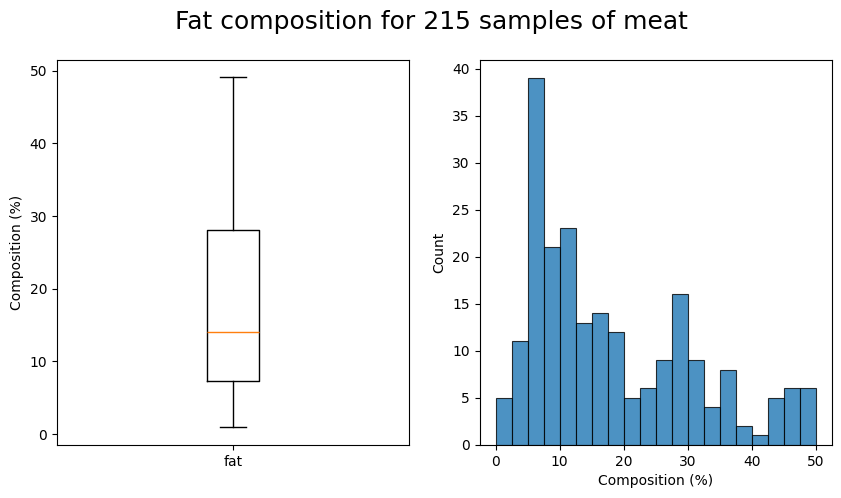

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].boxplot(fat_df, tick_labels=["fat"])
ax[0].set_ylabel("Composition (%)")

ax[1].hist(fat_df, bins=np.linspace(0, 50, 21), edgecolor="black", linewidth=0.8, alpha=0.8)
ax[1].set_xlabel("Composition (%)")
ax[1].set_ylabel("Count")

fig.suptitle("Fat composition for 215 samples of meat", fontsize=18)

plt.show()

Looks to be skewed right. As of now, we'll keep the composition as-is. Eventually, we may want to try a transformation to try to make the data normal.

### Visualize the first 5 wavelength spectra with the mean functional

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_13679/1418932477.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(wavelength_grid, tecator_df.mean(axis=0), linestyle="--", c="black", label="Mean functional $\mu(\lambda)$")
/tmp/ipykernel_13679/1418932477.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.title("First 5 $X_{i}(\lambda)$ samples of wavelength spectra")
/tmp/ipykernel_13679/1418932477.py:9: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel(f"Wavelength $\lambda$ ({wavelength_unit})")


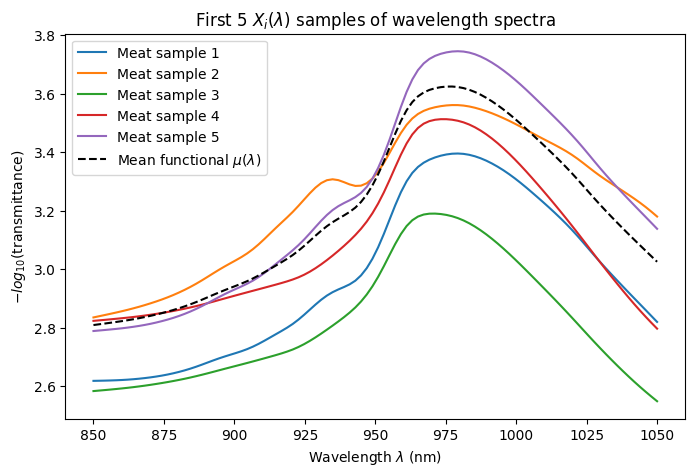

In [7]:
plt.figure(figsize=(8,5))

for i in range(5):
    plt.plot(wavelength_grid, tecator_df.iloc[i], label=f"Meat sample {i+1}")

plt.plot(wavelength_grid, tecator_df.mean(axis=0), linestyle="--", c="black", label="Mean functional $\mu(\lambda)$")

plt.title("First 5 $X_{i}(\lambda)$ samples of wavelength spectra")
plt.xlabel(f"Wavelength $\lambda$ ({wavelength_unit})")
plt.ylabel(r"$-log_{10}(\text{transmittance})$")
plt.legend()
plt.show()

The mean curve has a peak around 975 nm, and the first five functionals do, too. Behavior of samples on the higher end of the spectrum is pretty smooth, but we can't say the same about the lower end, especially between 925 and 950 nm. 

### Visualize the mean curve along with pointwise standard deviations

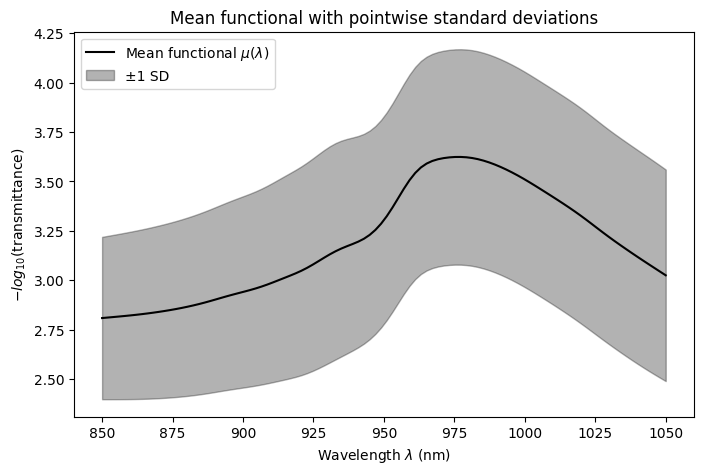

In [10]:
plt.figure(figsize=(8,5))

mean_curve = tecator_df.mean(axis=0)
std_curve = tecator_df.std(axis=0, ddof=1) # Note: ddof=1 means dividing by n-1.

# Mean curve.
plt.plot(wavelength_grid, tecator_df.mean(axis=0), c="black", label=r"Mean functional $\mu(\lambda)$")

# Pointwise standard deviation band.
plt.fill_between(
    wavelength_grid,
    mean_curve - std_curve,
    mean_curve + std_curve,
    alpha=0.3,
    color="black",
    label='±1 SD'
)

plt.title("Mean functional with pointwise standard deviations")
plt.xlabel(fr"Wavelength $\lambda$ ({wavelength_unit})")
plt.ylabel(r"$-log_{10}(\text{transmittance})$")
plt.legend()
plt.show()

The pointwise standard deviation isn't a perfect measure for functional data, but it suffices for an initial pass. This value is relatively constant across the entire spectrum.

## Conclusion

We are now ready to compare our linear regression methods:

1. Ordinary least squares on the 100 regressors
2. Ridge regression on the 100 regressors
3. Functional linear regression